## imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Constants

In [6]:
SURVIVAL_LABEL = ["Survived", "Deceased"]

SURVIVED    = "Survived"
PCLASS      = "Pclass"
NAME        = "Name"
SEX         = "Sex"
AGE         = "Age"
SIBSP       = "SibSp"
PARCH       = "Parch"
TICKET      = "Ticket"
FARE        = "Fare"
CABIN       = "Cabin"
EMBARKED    = "Embarked"

AGE_RANGE       = "Age_Range"
GENDER_AGE_CAT  = "Gender_Age_Cat"
IS_ALONE        = "Is_Alone"

# Datasets

In [51]:
test_data_path = "data/test.csv"
train_data_path = "data/train.csv"
submission_data_path = "data/gender_submission.csv"

In [52]:
df_train = pd.read_csv(train_data_path)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df_test = pd.read_csv(test_data_path)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
datasets = [df_train, df_test]

In [55]:
df_full = pd.concat(datasets).reset_index(drop=True)

m = df_full.shape[0]
m_test  = df_test.shape[0]
m_train = df_train.shape[0]
print(m, m_train, m_test)
df_full

1309 891 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
df_full.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [57]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### New Data Features

In [58]:
df_full[IS_ALONE] = (df_full.Parch + df_full.SibSp) == 0

df_full[IS_ALONE].value_counts()

True     790
False    519
Name: Is_Alone, dtype: int64

### Predicting Using Weak Model

In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

_d_ = df_train[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]].copy()
_d_ = _d_.dropna()

_encoder_ = LabelEncoder()
_d_.iloc[:, 2] = _encoder_.fit_transform(_d_.iloc[:, 2].values)
_d_.iloc[:, 5] = _encoder_.fit_transform(_d_.iloc[:, 5].values)

_s_scaler_ = StandardScaler()
_d_[["Age", "Fare"]] = _s_scaler_.fit_transform(_d_[["Age", "Fare"]])

_x_ = _d_.iloc[:, 0:].values
_y_ = _d_.Survived.values

_weak_model_ = LogisticRegression().fit(_x_, _y_)

_coef_ = _weak_model_.coef_.round(4).tolist()

sorted(
    list(zip(_d_.columns[1:], _coef_[0][1:]))
    , key=lambda tup: abs(tup[1]), reverse=True)

[('Sex', -1.0091),
 ('Pclass', -0.4858),
 ('Age', -0.2549),
 ('SibSp', -0.1523),
 ('Embarked', -0.103),
 ('Fare', 0.0913),
 ('Parch', -0.0141)]

Here It can be been that which labels had big role so lets focus on them first...

### Dataset Visualization

In [60]:
# Setting up visualisations
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(10,6), 
    'axes.facecolor': '#eee',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

#### Survival Status / Various Factors

##### Survived vs Deceased

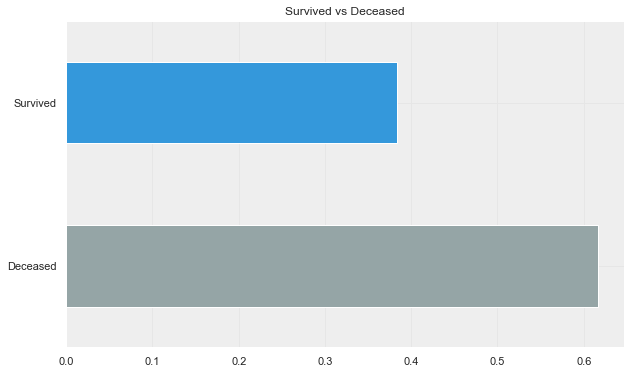

In [61]:
survival_ratio = df_full.Survived.value_counts(normalize=True)
survival_ratio.plot.barh(color=["C1", "C0"],)

plt.yticks((1, 0), labels=SURVIVAL_LABEL)
plt.title("Survived vs Deceased")
plt.show()

In [62]:
# sns.set(rc={'figure.figsize':(22,10)})

# ax = sns.countplot(y="answer", hue="sex", data=df)

# # percentage of bars
# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()+.12, i.get_y()+.3, \
#             '%' + str(round((i.get_width()/total)*100, 1)), fontsize=15,
#             color='dimgrey')
    
# ax.set_ylabel('Answers',fontsize=20)
# ax.set_xlabel('Count',fontsize=20)
# ax.tick_params(axis='x', which='major', labelsize=20)
# ax.tick_params(axis='y', which='major', labelsize=20)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
#           prop={'size': 14})


##### Survival / Sex (Male vs Female)

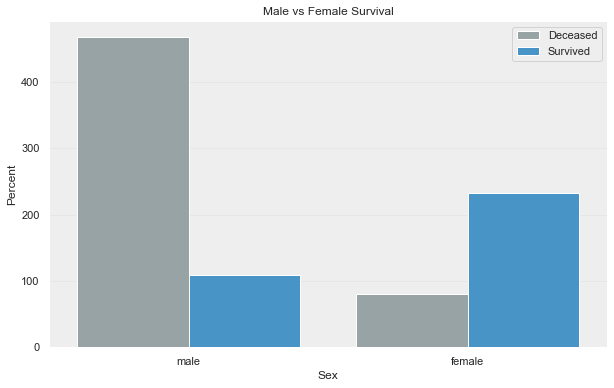

In [63]:
sex_survival_dist_chart = sns.countplot(x=SEX, hue=SURVIVED, data=df_full, palette=["C1", "C0"])
sex_survival_dist_chart.set(ylabel="Percent")

plt.title("Male vs Female Survival")
plt.legend(SURVIVAL_LABEL[::-1])
plt.show()

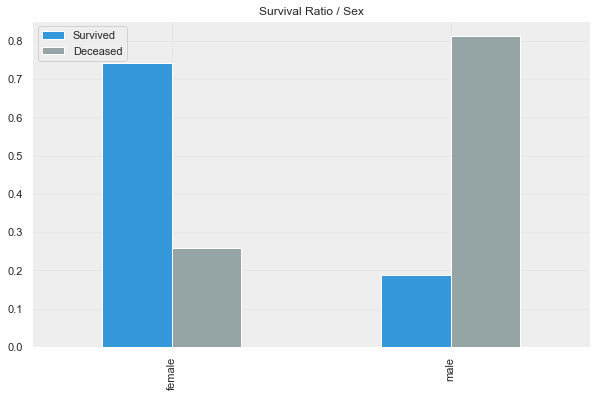

In [64]:
sex_survived_dist    = df_full[df_full.Survived==1].Sex.value_counts().sort_index()
sex_deceased_dist    = df_full[df_full.Survived==0].Sex.value_counts().sort_index()
sex_survival_dist    = pd.DataFrame([sex_survived_dist, sex_deceased_dist], index=SURVIVAL_LABEL).T
sex_survival_ratio   = sex_survival_dist.apply(lambda x: x/x.sum(), axis=1)

sex_survival_ratio.plot.bar()
plt.title("Survival Ratio / Sex")
plt.show()

Here we can see that Sex Really affected the Chance of Survival.<br>
The Bars are almost inverse of each other.

* Female - Lucky
* Male - Unlucky

##### Survival / Pclass Difference

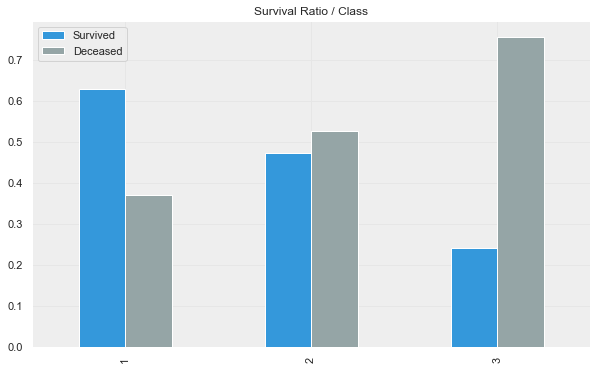

In [65]:
pclass_survived_dist    = df_full[df_full.Survived==1].Pclass.value_counts().sort_index()
pclass_deceased_dist    = df_full[df_full.Survived==0].Pclass.value_counts().sort_index()
pclass_survival_dist    = pd.DataFrame([pclass_survived_dist, pclass_deceased_dist], index=SURVIVAL_LABEL).T
pclass_survival_ratio   = pclass_survival_dist.apply(lambda x: x/x.sum(), axis=1)

pclass_survival_ratio.plot.bar()
plt.title("Survival Ratio / Class")
plt.show()

Here we can see that People with **higher Pclass** had more chance of survival than the people with **Lower Pclass** .<br>
Luck-> 1>2>3

* Pclass 1 - >60% Survival Change
* Pclass 2 - <50% Survival Change
* Pclass 3 - =25% Survival Change

##### Survival / Age Group

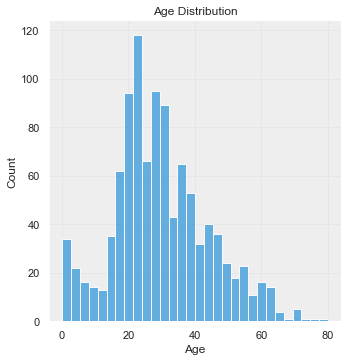

In [66]:
sns.displot(df_full.Age, bins=30)
plt.title("Age Distribution")
plt.show()

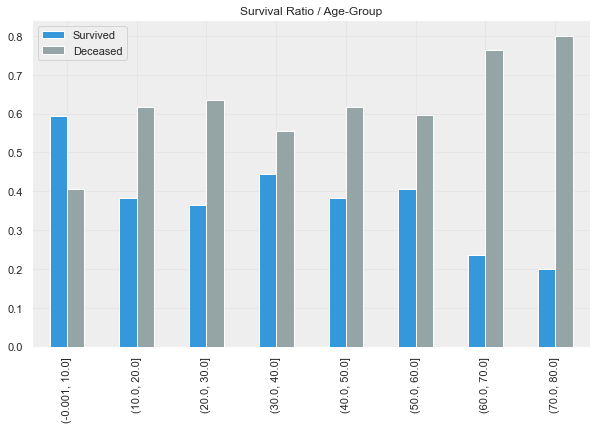

In [67]:
age_bins = np.arange(0, 81, 10)
Age_Range_df = pd.cut(df_full.Age, bins=age_bins, include_lowest=True)

age_grp_survived_dist    = Age_Range_df[df_full.Survived==1].value_counts().sort_index()
age_grp_deceased_dist    = Age_Range_df[df_full.Survived==0].value_counts().sort_index()
age_grp_survival_dist    = pd.DataFrame([age_grp_survived_dist, age_grp_deceased_dist], index=SURVIVAL_LABEL).T
age_grp_survival_ratio   = age_grp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

age_grp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Age-Group")
plt.show()

Here we can see that the Chance of Survival is different in different Age-Groups.<br>
The Bars are mixed, but we can see that - 
* 0-10 yrs agr group has the Highest chance of survival.
* 70-80 yrs agr group has the Lowest chance of survival.
* The Chance of Survial Varies from 60% - 20% depending upon the Age Group...

Thus The Age of the Passenger is important.

##### Survival / Sibbling & Spouse Number 

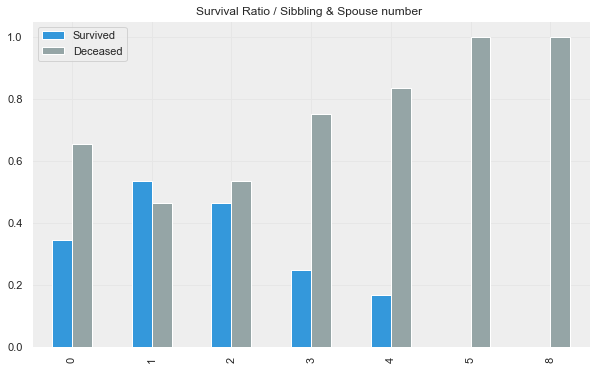

In [68]:
sibsp_survived_dist    = df_full[df_full.Survived==1].SibSp.value_counts().sort_index()
sibsp_deceased_dist    = df_full[df_full.Survived==0].SibSp.value_counts().sort_index()
sibsp_survival_dist    = pd.DataFrame([sibsp_survived_dist, sibsp_deceased_dist], index=SURVIVAL_LABEL).T
sibsp_survival_ratio   = sibsp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

sibsp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Sibbling & Spouse number ")
plt.show()

Here we can see that the Chance of Survival is increased if the passengers is traveling with 1-2 of their Sibling/Spouse then redused after that.<br>

The Bars follow - 
* mid-up-mid-down pattern is followed.
* Having >2 Sibling/Spouse slump the Chance of Survival.
* The Chance of Survial is best with 1-2 Sibling/Spouse.


##### Survival / Parents & Children Number 

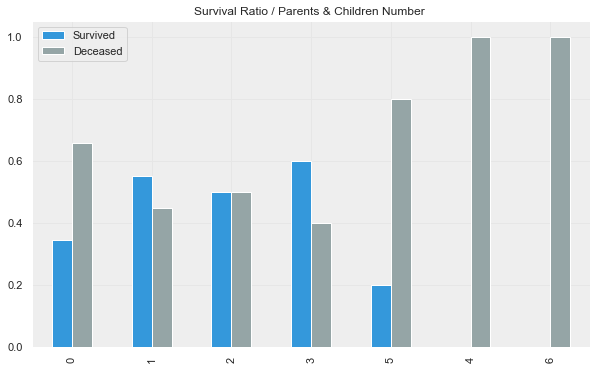

In [69]:
parch_survived_dist    = df_full[df_full.Survived==1].Parch.value_counts().sort_index()
parch_deceased_dist    = df_full[df_full.Survived==0].Parch.value_counts().sort_index()
parch_survival_dist    = pd.DataFrame([parch_survived_dist, parch_deceased_dist], index=SURVIVAL_LABEL).T
parch_survival_ratio   = parch_survival_dist.apply(lambda x: x/x.sum(), axis=1)

parch_survival_ratio.plot.bar()
plt.title("Survival Ratio / Parents & Children Number ")
plt.show()

Similar to SibSp, here we can see that the Chance of Survival is increased if the passengers is traveling with 1-3 of their Parents/Children then redused after that.<br>

The Bars follow - 
* Pattern similar to SibSp
* Having >3 Parents/Children slump the Chance of Survival.
* The Chance of Survial is best with 1-3 Parents/Children.


##### Survival / Family Members Number 

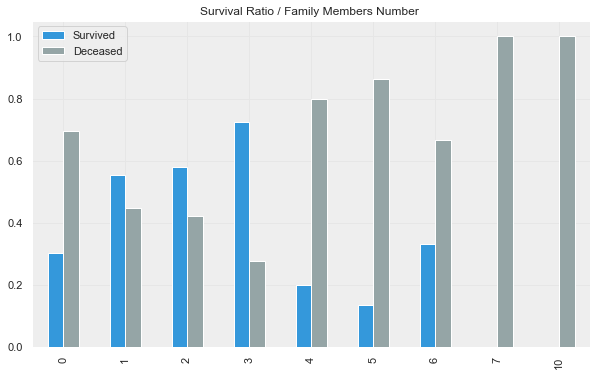

In [70]:
fam_num_df = df_full.Parch + df_full.SibSp

fam_num_survived_dist    = fam_num_df[df_full.Survived==1].value_counts().sort_index()
fam_num_deceased_dist    = fam_num_df[df_full.Survived==0].value_counts().sort_index()
fam_num_survival_dist    = pd.DataFrame([fam_num_survived_dist, fam_num_deceased_dist], index=SURVIVAL_LABEL).T
fam_num_survival_ratio   = fam_num_survival_dist.apply(lambda x: x/x.sum(), axis=1)

fam_num_survival_ratio.plot.bar()
plt.title("Survival Ratio / Family Members Number ")
plt.show()

When we add the number of family members we get a really intresting pattern.<br>

The Bars follow - 
* Mid-Up-Down pattern, with less maximas and minimas.
* Having >3 Family Members slump the Chance of Survival.
* The Chance of Survial is best with 1-3 Family Members.

#####  Survival / Embark Point

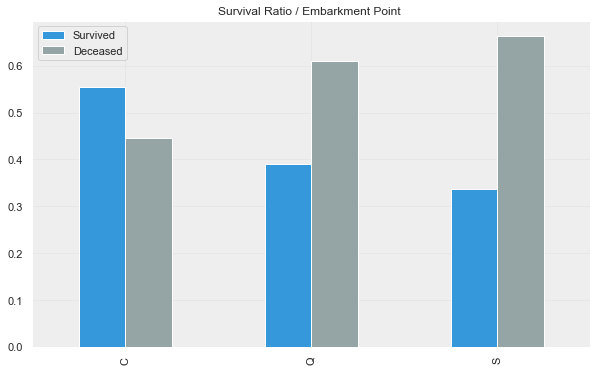

In [71]:
embark_survived_dist    = df_full[df_full.Survived==1].Embarked.value_counts().sort_index()
embark_deceased_dist    = df_full[df_full.Survived==0].Embarked.value_counts().sort_index()
embark_survival_dist    = pd.DataFrame([embark_survived_dist, embark_deceased_dist], index=SURVIVAL_LABEL).T
embark_survival_ratio   = embark_survival_dist.apply(lambda x: x/x.sum(), axis=1)

embark_survival_ratio.plot.bar()
plt.title("Survival Ratio / Embarkment Point ")
plt.show()

Vaguely Speaking, The Embarkment Point dosen't seem to be a big reason for variation in survival rate. But Visually it says a different story.
<br>

People who embarked from C, have Higher Chance of survival Than those who Embarked from Other Places.

#####  Survival / Fare

In [72]:
df_full.Fare.describe().to_dict()

{'count': 1308.0,
 'mean': 33.2954792813456,
 'std': 51.75866823917414,
 'min': 0.0,
 '25%': 7.8958,
 '50%': 14.4542,
 '75%': 31.275,
 'max': 512.3292}

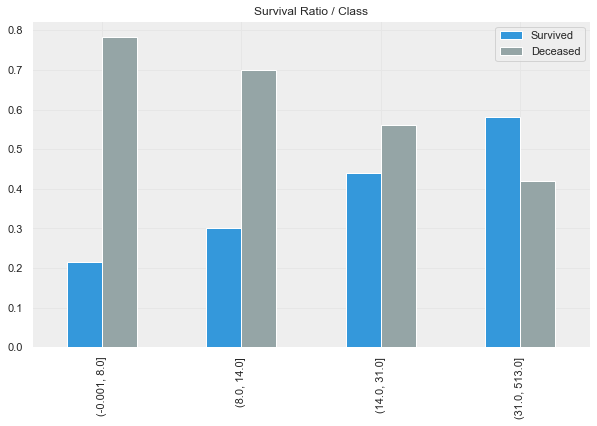

In [73]:
fare_bins = [0, 8, 14, 31, 513]
fare_Range_df = pd.cut(df_full.Fare, bins=fare_bins, include_lowest=True)

fare_grp_survived_dist    = fare_Range_df[df_full.Survived==1].value_counts().sort_index()
fare_grp_deceased_dist    = fare_Range_df[df_full.Survived==0].value_counts().sort_index()
fare_grp_survival_dist    = pd.DataFrame([fare_grp_survived_dist, fare_grp_deceased_dist], index=SURVIVAL_LABEL).T
fare_grp_survival_ratio   = fare_grp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

fare_grp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Class")
plt.show()

In [74]:
np.log(df_full.Fare.dropna() + 1e-1).astype(int)

0       1
1       4
2       2
3       3
4       2
       ..
1304    2
1305    4
1306    1
1307    2
1308    3
Name: Fare, Length: 1308, dtype: int64

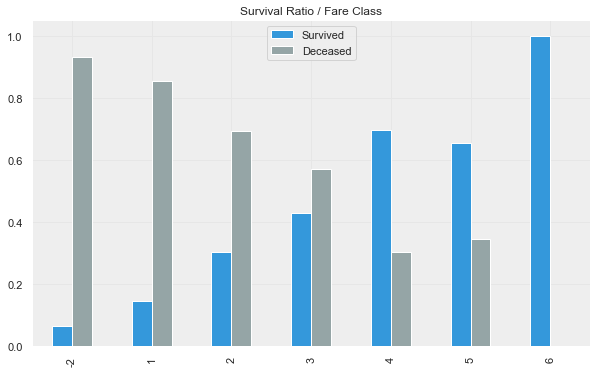

In [75]:
fare_Range_df = np.log(df_full.Fare.dropna() + 1e-1).astype(int)

fare_log_grp_survived_dist    = fare_Range_df[df_full.Survived==1].value_counts().sort_index()
fare_log_grp_deceased_dist    = fare_Range_df[df_full.Survived==0].value_counts().sort_index()
fare_log_grp_survival_dist    = pd.DataFrame([fare_log_grp_survived_dist, fare_log_grp_deceased_dist], index=SURVIVAL_LABEL).T
fare_log_grp_survival_ratio   = fare_log_grp_survival_dist.apply(lambda x: x/x.sum(), axis=1)

fare_log_grp_survival_ratio.plot.bar()
plt.title("Survival Ratio / Fare Class")
plt.show()

Fare is related to Pclass, Higher the Fare, Higher The Class.<br>
It is a Greate Feature to Use insted/along Pclass...<br><br>

It will be tested later.

### Missing Dataset and Dealing With it.

<AxesSubplot:>

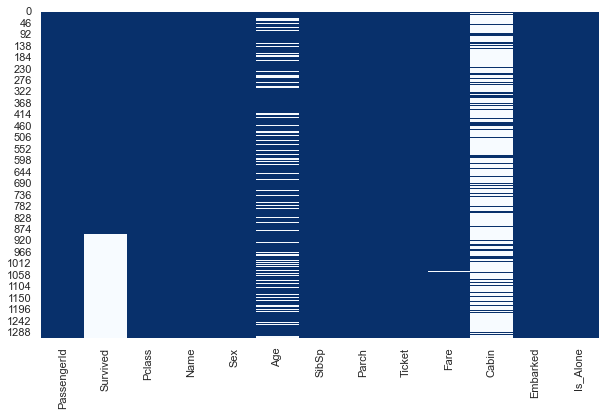

In [76]:
sns.heatmap(data=df_full.notna(), cbar=False, cmap="Blues")

The data with "White" lines represent missing data and "Blue" lines represent not-null data.<br>
We can either predict the missing data or leave the entire feature.

In [77]:
{k : i 
 for k, i in (m - df_full.notna().sum()).to_dict().items()
 if i}

{'Survived': 418, 'Age': 263, 'Fare': 1, 'Cabin': 1014, 'Embarked': 2}

Let's Now Predict the missing Values of **Embarked**, **Fare** and **Age**.

#### Embarked

In [78]:
df_full.Embarked.value_counts(normalize=1)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

Since around 70% people Embarked from S.
lets simply take the mode.

In [79]:
df_full.Embarked = df_full.Embarked.fillna(df_full.Embarked.mode()[0])

In [80]:
df_full.Embarked.isna().sum()

0

### Fare

In [81]:
df_full[df_full.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Alone
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,True


We'll be choosing the mean of Fare in the group of people whose Pclass and Sex are the same.

In [86]:
grp_1 = df_full.groupby([PCLASS, SEX, IS_ALONE])
grp_1.Fare.apply(lambda fare: ((fare.shape[0], fare.isna().sum()), fare.mean(), fare.std()))

Pclass  Sex     Is_Alone
1       female  False         ((92, 0), 108.8162608695652, 79.64699114807216)
                True          ((52, 0), 110.46706538461538, 89.1195711367376)
        male    False          ((71, 0), 109.5645563380282, 78.2697508283331)
                True        ((108, 0), 43.80497592592593, 58.224950901942556)
2       female  False       ((64, 0), 28.671875000000004, 10.625869177236565)
                True          ((42, 0), 14.94980238095238, 5.794991860617955)
        male    False       ((55, 0), 29.502349090909092, 13.727649625979552)
                True        ((116, 0), 15.354452586206895, 13.010889441731...
3       female  False        ((116, 0), 21.1828301724138, 13.213321620613694)
                True        ((100, 0), 8.528295999999997, 3.4672658984697016)
        male    False       ((121, 0), 22.12138677685951, 14.909473647209134)
                True         ((372, 1), 9.249917789757417, 7.439714479973044)
Name: Fare, dtype: object

In [87]:
grp_1 = df_full.groupby([PCLASS, SEX, IS_ALONE])
df_full.Fare = grp_1.Fare.apply(lambda fare: fare.fillna(fare.mean()))

### Age

For Age Using only Sex and PClass may not be a good way, as this would easily skip all the children since the mean age is so high.<br>

Insted Lets Use Name. Yes, Name! to predict the age. <br>

We can use the title in the name as one of the feature to predict the age.

In [89]:
{k : i 
 for k, i in (m - df_full.notna().sum()).to_dict().items()
 if i}

{'Survived': 418, 'Age': 263, 'Cabin': 1014}

In [90]:
titles = df_full.Name.apply(lambda name: name.split(",")[1].split(".")[0].strip())
print(titles.unique())
titles[df_full.Age.isna()].value_counts()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Name, dtype: int64

We Can join and use some titles as one. <br>
Though, This will increase the number of groups, at the same time this will also reduce edge case percentage.

In [91]:
male_titles     = titles[(df_full.Sex == "male")].unique()
female_titles   = titles[(df_full.Sex == "female")].unique()

unisex_titles       = [title_ for title_ in male_titles if title_ in female_titles]
male_only_titles    = [title_ for title_ in male_titles if title_ not in unisex_titles]
female_only_titles  = [title_ for title_ in female_titles if title_ not in unisex_titles]

unisex_titles, male_only_titles, female_only_titles

(['Dr'],
 ['Mr', 'Master', 'Don', 'Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer'],
 ['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'])

We can make 5 Categories - 
* Mr,  Don,  Rev,  Major,  Sir,  Col,  Capt,  Jonkheer, [Dr]
* Mrs,  Mme,  Lady,  Mlle,  the Countess,  Dona, [Dr]
* Master
* Miss, Ms (Those Who Traveled Alone, Implying They may be olded)
* Miss, Ms (Those Who Traveled With Someone, Implying They may be younger)

In [110]:
Title_Cat_1 = ["Mr",  "Don",  "Rev",  "Major",  "Sir",  "Col",  "Capt",  "Jonkheer"]
Title_Cat_2 = ["Mrs",  "Mme",  "Lady",  "Mlle",  "the Countess",  "Dona"]
Title_Cat_3 = ["Master"]
Title_Cat_4 = ["Miss", "Ms"]


In [107]:
title_cat_num = titles.replace(Title_Cat_1, value="Adult Male")
title_cat_num = title_cat_num.replace(Title_Cat_2, "Adult Female")
title_cat_num = title_cat_num.replace(Title_Cat_3, "Young Boy")
title_cat_num = title_cat_num.replace(Title_Cat_4, "Young Female")

title_cat_num[(df_full.Sex=="male") & (title_cat_num=="Dr")]    = "Adult Male"
title_cat_num[(df_full.Sex=="female") & (title_cat_num=="Dr")]  = "Adult Female"
title_cat_num[(df_full.Is_Alone==0) & (df_full.Gender_Age_Cat=="Young Female")] = "Young Girl"

df_full[GENDER_AGE_CAT] = title_cat_num
df_full.Gender_Age_Cat.value_counts()

Adult Male      782
Adult Female    204
Young Female    152
Young Girl      110
Young Boy        61
Name: Gender_Age_Cat, dtype: int64

In [109]:
grp_2 = df_full.groupby([GENDER_AGE_CAT, PCLASS])
grp_2.Age.apply(lambda age: (age.mean(), (age.shape[0], age.isna().sum()), age.std()))

Gender_Age_Cat  Pclass
Adult Female    1         (42.37837837837838, (84, 10), 13.963457889735988)
                2          (33.51851851851852, (55, 1), 10.493017877564865)
                3         (32.326530612244895, (65, 16), 10.194744878085...
Adult Male      1         (42.195205479452056, (174, 28), 13.33576643876...
                2         (32.914965986394556, (160, 13), 12.07586948423...
                3         (28.318910256410255, (448, 136), 9.90785820014...
Young Boy       1                         (6.984, (5, 0), 4.97406071535119)
                2         (2.7572727272727273, (11, 0), 2.7239423301864925)
                3          (6.090000000000001, (45, 8), 4.1525661410211825)
Young Female    1           (33.65714285714286, (36, 1), 9.551540858579271)
                2                     (28.6875, (26, 2), 9.773313820986118)
                3           (22.83050847457627, (90, 31), 6.66928766907366)
Young Girl      1                       (25.5, (24, 0), 12.934618